
# Simple Classification Example

This chapter presents a complete **binary classification workflow**
using a **Multi-Layer Perceptron (MLP)**.
The focus is on understanding concepts, data flow, and model behavior.



## Introduction to a Basic Dataset

A dataset for classification consists of input features and corresponding labels.
Each sample represents one observation from the problem domain.



### Conceptual View of the Dataset

- Each row corresponds to one data instance
- Each column corresponds to a feature
- The label indicates the class membership
- Classification aims to learn a mapping from features to labels



### Why a Simple Dataset is Chosen

- Reduces cognitive load while learning
- Makes model behavior interpretable
- Enables visualization of decision boundaries
- Allows focus on algorithmic concepts rather than data complexity


The below code creates and displays a sample binary classification dataset.
It generates 1200 data points

Each data point has two features

Each point belongs to one of two classes (0 or 1)

The data is artificial (synthetic), created only for learning and testing purposes


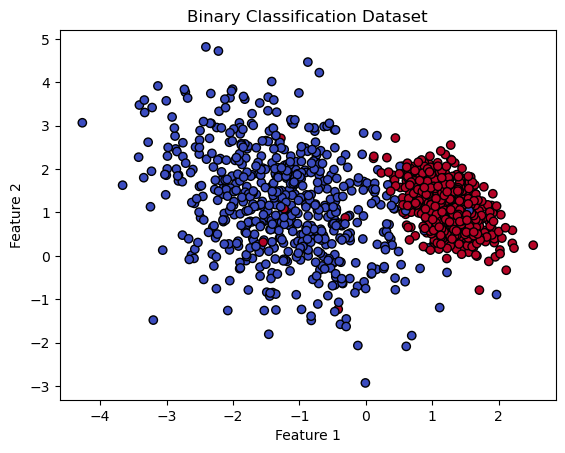

In [3]:

from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

X, y = make_classification(
    n_samples=1200,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=1.2,
    random_state=42
)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Binary Classification Dataset")
plt.show()



## Data Preparation and Preprocessing

Raw data is rarely suitable for direct input into a neural network.
Preprocessing ensures numerical stability and efficient learning.



### Importance of Data Splitting

- Training set is used to learn parameters
- Test set is used to evaluate generalization
- Prevents information leakage



### Mathematical Intuition Behind Feature Scaling

- Gradient descent assumes comparable feature magnitudes
- Unscaled features lead to skewed gradients
- Scaling improves convergence speed and stability


This code splits the dataset into training and testing parts and then scales the feature values so that they are on the same scale.
The training data is used to learn the model, the testing data is used to evaluate it, and scaling helps the model train faster and more accurately.


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train.mean(axis=0), X_train.std(axis=0)



## Designing a Simple MLP Model

A Multi-Layer Perceptron is a feedforward neural network
composed of stacked layers of artificial neurons.



### Role of Each Layer

- Input layer receives raw features
- Hidden layers learn intermediate representations
- Output layer produces final prediction



### Choice of Activation Functions

- ReLU introduces non-linearity and avoids vanishing gradients
- Sigmoid converts outputs into probabilities


In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(2,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()



## Forward Pass and Prediction

The forward pass propagates input features through the network layers.
Each layer applies a linear transformation followed by a non-linear activation.



### Mathematical Representation of the Forward Pass

- z = Wx + b
- a = f(z)
- Repeated across layers



### Training Configuration

- Binary cross-entropy loss measures classification error
- Adam optimizer updates parameters efficiently


In [ ]:

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=0
)



### Generating Class Predictions

- Model outputs probabilities
- Thresholding converts probabilities to class labels


In [ ]:

y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

y_pred[:10]



## Model Evaluation using Accuracy

Accuracy is the ratio of correctly predicted samples
to the total number of samples.



### Strengths and Limitations of Accuracy

- Easy to interpret
- Suitable for balanced datasets
- May be misleading for imbalanced data


In [ ]:

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy



## Experimental Observations

- Feature scaling improves learning stability
- Increasing neurons increases representational capacity
- Excessive complexity may cause overfitting



### Learning Behavior

- Early epochs show rapid improvement
- Later epochs fine-tune decision boundaries
- Validation performance indicates generalization



## Exercises

1. Modify hidden layer size and observe accuracy changes
2. Replace ReLU with Tanh and compare results
3. Train without feature scaling
4. Plot training and validation accuracy curves
5. Introduce noise and analyze robustness



## Mini Project

Extend this example to multi-class classification:

- Use three or more classes
- Replace sigmoid with softmax
- Modify loss function
- Evaluate using accuracy and confusion matrix
